# Ridge and Lasso Regression

#### Dr. Urban Ulrych
#### Spring 2023

The topic of this task is model selection and the bias-variance tradeoff. Simulate a dataset of size $n=100$ consisting of the target variable $\mathbf{y}$ and the independent variables $\mathbf{x}_1, \dots , \mathbf{x}_{10}$. All variables are standard normally distributed and independent.

- Split the data into two parts: the training data (first 50 data points) and the test data (last 50 data points). Fit the following cascade of models using just the training data: the empty model, $\mathbf{y}$ on $\mathbf{x}_1$, $\mathbf{y}$ on $\mathbf{x}_1$ and $\mathbf{x}_2$, etc., up to the full model. For each of the 11 models compute the mean squared error (MSE) on the training set. What do you notice?

- Now compute the MSE for each of the models on the test data and compare the results with the previous part. Which method gives you a better estimate of the expected loss and why?

- Perform shrinkage and variable selection using ridge and LASSO regressions on the full dataset. Plot the cross-validated MSE curves for ridge and LASSO regression. Report the values of the penalization parameter $\lambda$ for ridge and for LASSO that result in the minimal cross-validated MSE-s.

- Since you simulated the data independently, the true model is $\mathbf{y} = \boldsymbol{\epsilon}$, where $\boldsymbol{\epsilon}$ denotes the error term. Consider your result regarding this. Which method seems to work best/worst?

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

In [2]:
#set the hyperparameters
n_simul = 100 #number of observations
n_pred  = 10 #number of predictors
test_size = 0.5 #define the test size , 0.5 means 50% of data set
K_Folds = 10 #the number of folds with which one cross validates

In [3]:
#simulate the data set

#generate a matrix of size 100 x 10 of standard normally distributed numbers
X = np.random.standard_normal(size=(n_simul, n_pred))

#generate a vector of size 100 x 1 of standard normally distributed numbers
Y = np.random.standard_normal(size=(n_simul, 1))

# split the data into training and test set based on the input above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)

In [4]:
#initialize the mse_train variable
mse_train = np.zeros((n_pred + 1, 1))

#input the empty model and train the regression on a vector of zeros and as target variable Y train
reg = LinearRegression().fit(np.zeros((len(Y_train), 1)), Y_train)

#predict on the train set again with a vector of zeros
pred = reg.predict(np.zeros((len(Y_train), 1)))

#calculate the mean squared error of the prediction and Y train
mse_train[0] = mse(pred, Y_train)

#repeat the above procedure with an increasing number of predictors
for i in range(1, n_pred + 1):
    reg = LinearRegression().fit(X_train[:, :i], Y_train)
    pred = reg.predict(X_train[:, :i])
    mse_train[i] = mse(pred, Y_train)

In [5]:
#initialize the mse_test variable
mse_test = np.zeros((n_pred + 1, 1))

#evaluate the empty model
reg = LinearRegression().fit(np.zeros((len(Y_train), 1)), Y_train)

#now predict on the test set
pred = reg.predict(np.zeros((len(Y_train), 1)))

#evaluate the prediction on the test set
mse_test[0] = mse(pred, Y_test)

#train the model on the train set and evaluate prediction on the test set
for i in range(1, n_pred + 1):
    reg = LinearRegression().fit(X_train[:, :i], Y_train) 
    pred = reg.predict(X_test[:, :i])
    mse_test[i] = mse(pred, Y_test)

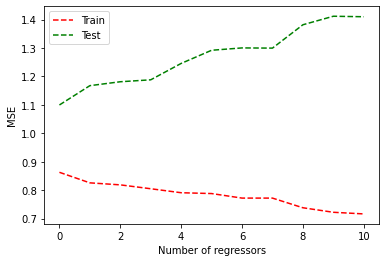

In [6]:
#plot the train and test mean squared errors (MSEs)
plt.plot(mse_train, 'r--', label='Train')
plt.plot(mse_test, 'g--', label='Test')
plt.xlabel('Number of regressors')
plt.ylabel('MSE')
plt.legend(loc='upper left')
plt.show()

In [7]:
#set the array of penalization parameters on which the two models will be tested
alphas = np.logspace(-4, 5, 100, endpoint=True, base=10.0)

In [8]:
#shrinkage with the Ridge regression

#use the function validation curve to produce the mse on the all the training folds and the single validation fold
train_scores_ridge, test_scores_ridge = validation_curve(Ridge(), X, Y, scoring = 'neg_mean_squared_error', param_name = 'alpha', param_range = alphas, cv = K_Folds)

#train another ridge cross validated model to access the best alpha
ridge = RidgeCV(alphas = alphas, cv = K_Folds, fit_intercept=False).fit(X, np.ravel(Y))

#this is the alpha chosen by python whcih works best for the model
ridge_alpha = ridge.alpha_

#calculate the mean of the mse scores on the initially specified number of folds
train_scores_mean_ridge = np.mean(train_scores_ridge, axis=1)
test_scores_mean_ridge = np.mean(test_scores_ridge, axis=1)

In [9]:
#shrinkage with the Lasso regression

#use the function validation curve to produce the mse on the all the training folds and the single validation fold
train_scores_lasso, test_scores_lasso = validation_curve(Lasso(), X, Y, scoring = 'neg_mean_squared_error', param_name = 'alpha', param_range = alphas, cv = K_Folds)

#train another ridge cross validated model to access the best alpha
#lasso = LassoCV(alphas = alphas, cv = K_Folds).fit(X, Y)
lasso = LassoCV(alphas = alphas, cv = K_Folds, fit_intercept=False).fit(X, np.ravel(Y))

#this is the alpha chosen by python whcih works best for the model
lasso_alpha = lasso.alpha_

#calculate the mean of the mse scores on the initially specified number of folds
train_scores_mean_lasso = np.mean(train_scores_lasso, axis=1)
test_scores_mean_lasso = np.mean(test_scores_lasso, axis=1)

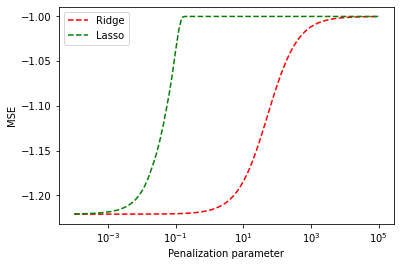

(100000.0, 100000.0)

In [10]:
#plot the cross-validated MSE curves for ridge and lasso
plt.plot(alphas, test_scores_mean_ridge, 'r--', label='Ridge')
plt.plot(alphas, test_scores_mean_lasso, 'g--', label='Lasso')
plt.xscale('log')
plt.xlabel('Penalization parameter')
plt.ylabel('MSE')
plt.legend(loc='upper left')
plt.show()
ridge_alpha, lasso_alpha

In [11]:
#initialize the ridge_coefs variable
ridge_coefs = []

#save the value of the ridge regression coefficients for each penalization parameter alpha
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, Y)
    ridge_coefs.append(np.ravel(ridge.coef_))

In [12]:
#initialize the lasso_coefs variable
lasso_coefs = []

#save the value of the lasso regression coefficients for each penalization parameter alpha
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, Y)
    lasso_coefs.append(np.ravel(lasso.coef_))

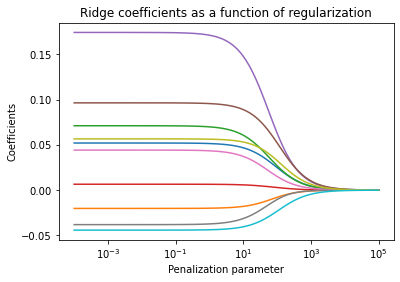

In [13]:
#plot the ridge regression coefficients in dependence of the penalization parameter alpha
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale("log")
plt.xlabel('Penalization parameter')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of regularization')
plt.show()

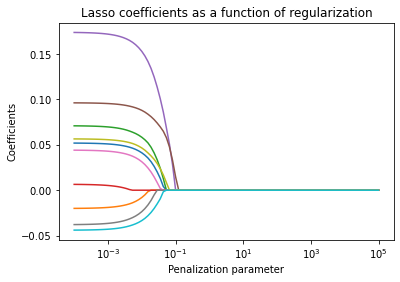

In [14]:
#plot the lasso regression coefficients in dependence of the penalization parameter alpha
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale("log")
plt.xlabel('Penalization parameter')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of regularization')
plt.show()